<a href="https://colab.research.google.com/github/seabay/ml_practice/blob/master/Metropolis_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import math

In [2]:
mu=15
sigma=5

x=np.arange(0, 30, 0.001) # entire range of x, both in and out of spec
y=norm.pdf(x, mu, sigma)

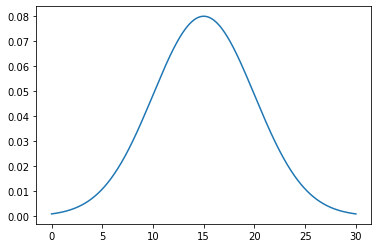

In [3]:
plt.plot(x, y)

In [4]:
def pdf_f(x):
  return norm.pdf(x, 15, 5)

In [79]:
# https://blog.demofox.org/2019/05/25/generating-random-numbers-from-a-specific-distribution-with-the-metropolis-algorithm-mcmc/
NUM_TEST_SAMPLES=80000
NUM_HISTOGRAM_BUCKETS=100
rngRange=30
def sample():

    histogram=[0]*NUM_HISTOGRAM_BUCKETS
    start=15.0
    y=pdf_f(start)
    for i in range(NUM_TEST_SAMPLES):
        nstart = start + np.random.normal(0, 0.2, 1)[0]
        ny=pdf_f(nstart)
        a=ny/y
        if a>=1 or np.random.uniform(0,1)<a:
            start=nstart
            y=ny
            bin = math.floor(start * float(NUM_HISTOGRAM_BUCKETS) / rngRange);
            histogram[min(bin, NUM_HISTOGRAM_BUCKETS - 1)] +=1;

    return histogram

        

In [80]:
ret=sample()

In [81]:
ret1=[NUM_HISTOGRAM_BUCKETS * float(ret[i]) / (float(NUM_TEST_SAMPLES)*rngRange) for i in range(NUM_HISTOGRAM_BUCKETS)]

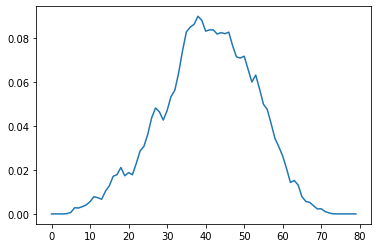

In [82]:
plt.plot(ret1)